In [1]:
# 📦 Import required libraries
import numpy as np   # Numerical operations
import pandas as pd  # Data manipulation
import os            # File and directory operations

# ✅ Set your local data directory (update the path if needed)
data_dir = r"dataset\Aadhar card"  # 🔁 Change this path to your actual folder

# ✅ List all files in the directory and subdirectories
print(f"📂 Listing all files under: {data_dir}\n")

for root, dirs, files in os.walk(data_dir):
    for file in files:
        file_path = os.path.join(root, file)
        print("📄", file_path)


📂 Listing all files under: dataset\Aadhar card

📄 dataset\Aadhar card\data.yaml
📄 dataset\Aadhar card\README.dataset.txt
📄 dataset\Aadhar card\README.roboflow.txt
📄 dataset\Aadhar card\test\images\0521_adhar_jpg.rf.72e13b4a4ab63197d7bab138671ba17c.jpg
📄 dataset\Aadhar card\test\images\06a0686f91bed47d1f4873e4d104442c_jpg.rf.4de248f1b4d17d260413ea9bdde71762.jpg
📄 dataset\Aadhar card\test\images\06a0686f91bed47d1f4873e4d104442c_jpg.rf.ca85802ebdca5a2f1f293741021a6645.jpg
📄 dataset\Aadhar card\test\images\06_01_2022_03_14_17_png_jpg.rf.84c131e9f3739196dcb217ce66872568.jpg
📄 dataset\Aadhar card\test\images\06_01_2022_03_14_51_png_jpg.rf.066ab05c8e52e0c8eb7f8160c29a5aae.jpg
📄 dataset\Aadhar card\test\images\06_01_2022_03_14_59_png_jpg.rf.7d753a7852c989342a25fbf67bf385e9.jpg
📄 dataset\Aadhar card\test\images\06_01_2022_03_15_10_png_jpg.rf.17c7b58f4770bbdfe37d7d6379c0d9b8.jpg
📄 dataset\Aadhar card\test\images\086d820550f34066764f4047ddc263ca_jpg.rf.32454616917066849f631ca30a4b828c.jpg
📄 datas

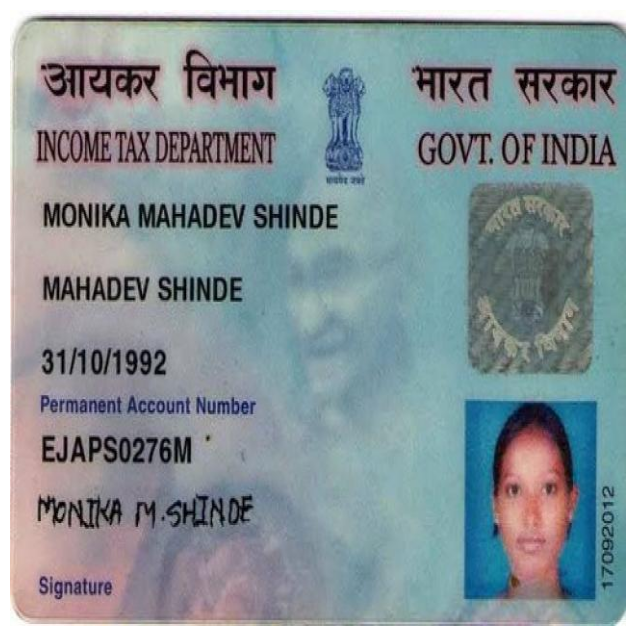

In [5]:
import os
import cv2
import matplotlib.pyplot as plt

# Define the paths to images and labels
image_dir = r'dataset\Aadhar card\train\images'
label_dir = r'dataset\Aadhar card\train\labels'

# Class labels
class_names = ['0', '1', '2', '4', '5']

# Function to load and display an image with bounding boxes
def display_image_with_boxes(image_path, label_path):
    # Load the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for display

    # Get the image dimensions
    height, width, _ = image.shape

    # Load the label file and draw bounding boxes
    with open(label_path, 'r') as file:
        for line in file.readlines():
            class_id, x_center, y_center, box_width, box_height = map(float, line.strip().split())
            class_id = int(class_id)

            # Convert normalized coordinates to pixel values
            x_center *= width
            y_center *= height
            box_width *= width
            box_height *= height

            # Calculate top-left and bottom-right corners of the bounding box
            x1 = int(x_center - box_width / 2)
            y1 = int(y_center - box_height / 2)
            x2 = int(x_center + box_width / 2)
            y2 = int(y_center + box_height / 2)

            # Draw the bounding box and label on the image
            color = (0, 255, 0)  # Green color for the box
            cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)
            label = class_names[class_id]
            cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    # Display the image
    plt.figure(figsize=(8, 8))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

# Select an image and its corresponding label file to display
sample_image = os.path.join(image_dir, os.listdir(image_dir)[0])
sample_label = os.path.join(label_dir, os.path.splitext(os.listdir(image_dir)[0])[0] + '.txt')

# Display the image with bounding boxes
display_image_with_boxes(sample_image, sample_label)


In [7]:
print(sample_image)

dataset\Aadhar card\train\images\0005_jpeg_jpg.rf.252590ac8ae7f0f84a08f15a164d6cb0.jpg
